# Box-Cox and Yeo-Johnson Transformations

## 1. Box-Cox Transformation

### Mathematical Formulation:
The Box-Cox transformation is defined as follows:
\[ 
y(\lambda) = 
\begin{cases} 
\frac{{y^\lambda - 1}}{{\lambda}} & \text{if } \lambda \neq 0 \\
\log(y) & \text{if } \lambda = 0
\end{cases}
\]

### Key Points:
- The parameter \(\lambda\) is a variable that can be any real number.
- The transformation is applied to positive data values.
- The choice of \(\lambda\) is determined by maximizing the log-likelihood function, often achieved through optimization methods.

### When to Use:
- The Box-Cox transformation is suitable when the data has positive values, and there is a need to stabilize variance and make the distribution more normal.
- It is commonly used when applying statistical tests that assume normality, such as ANOVA or linear regression.

## 2. Yeo-Johnson Transformation

### Mathematical Formulation:
The Yeo-Johnson transformation is an extension of the Box-Cox transformation and is defined as follows:
\[ 
y(\lambda) = 
\begin{cases} 
\left(\frac{{y+1}^\lambda - 1}}{{\lambda}}\right) & \text{if } y \geq 0 \text{ and } \lambda \neq 0 \\
\log(y+1) & \text{if } y \geq 0 \text{ and } \lambda = 0 \\
-\left(\frac{{-y+1}^{2-\lambda} - 1}}{{2-\lambda}}\right) & \text{if } y < 0 \text{ and } \lambda \neq 2 \\
-\log(-y+1) & \text{if } y < 0 \text{ and } \lambda = 2
\end{cases}
\]

### Key Points:
- The Yeo-Johnson transformation extends the Box-Cox to handle zero and negative values.
- It introduces an additional parameter to handle negative values, providing more flexibility.

### When to Use:
- The Yeo-Johnson transformation is useful when dealing with data that includes zero or negative values.
- Like the Box-Cox transformation, it is employed to stabilize variance and approximate a normal distribution.

### Choosing Between Box-Cox and Yeo-Johnson:

- **Box-Cox Limitations:**
  - The Box-Cox transformation is restrictive when it comes to handling zero or negative values.
  - It assumes that the data is strictly positive.

- **Yeo-Johnson Advantages:**
  - The Yeo-Johnson transformation is more flexible and can handle data with a mixture of positive, zero, and negative values.
  - It allows for a wider range of transformations, making it a preferred choice in some cases.

### Guidelines for Application:

- **Box-Cox:**
  - Suitable for strictly positive data.
  - Use when there are no zero or negative values.

- **Yeo-Johnson:**
  - Suitable for data with a mixture of positive, zero, and negative values.
  - Use when dealing with data that mns.
# Visualizations of original and transformed data are included.


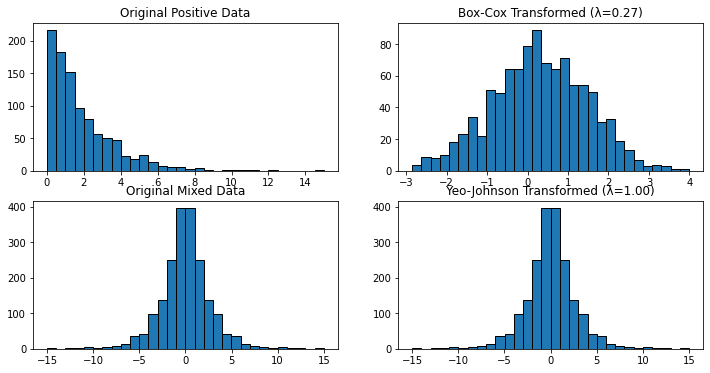

In [13]:
import numpy as np
from scipy.stats import boxcox, yeojohnson
import matplotlib.pyplot as plt

# Generate positive data
positive_data = np.random.exponential(scale=2, size=1000)

# Generate data with a mixture of positive, zero, and negative values
mixed_data = np.concatenate([positive_data, [0], -positive_data])

# Apply Box-Cox transformation
transformed_positive_boxcox, lambda_boxcox = boxcox(positive_data)

# Apply Yeo-Johnson transformation
transformed_mixed_yeojohnson, lambda_yeojohnson = yeojohnson(mixed_data)

# Plot original and transformed data
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(positive_data, bins=30, edgecolor='black')
plt.title('Original Positive Data')

plt.subplot(2, 2, 2)
plt.hist(transformed_positive_boxcox, bins=30, edgecolor='black')
plt.title(f'Box-Cox Transformed (λ={lambda_boxcox:.2f})')

plt.subplot(2, 2, 3)
plt.hist(mixed_data, bins=30, edgecolor='black')
plt.title('Original Mixed Data')

plt.subplot(2, 2, 4)
plt.hist(transformed_mixed_yeojohnson, bins=30, edgecolor='black')
plt.title(f'Yeo-Johnson Transformed (λ={lambda_yeojohnson:.2f})')

plt.show()


In [14]:
import pandas as pd
print('Psoitiuve Data',pd.DataFrame(positive_data).skew())
print('After Box Cox',pd.DataFrame(transformed_positive_boxcox).skew())
print('Mix Data',pd.DataFrame(mixed_data).skew())
print('After Yeo Johnson',pd.DataFrame(transformed_mixed_yeojohnson).skew())


Psoitiuve Data 0    2.038683
dtype: float64
After Box Cox 0   -0.033169
dtype: float64
Mix Data 0    0.0
dtype: float64
After Yeo Johnson 0    1.139247e-13
dtype: float64


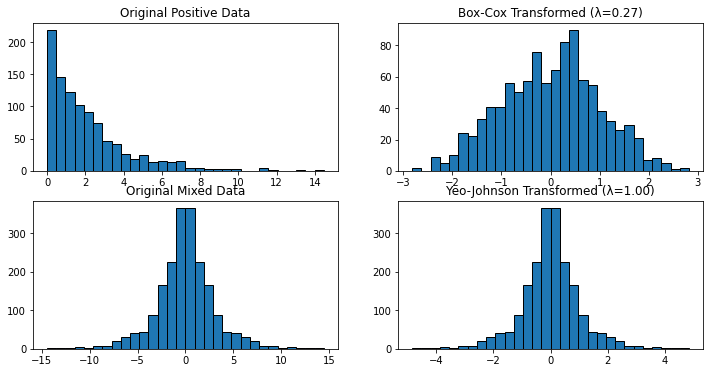

In [17]:
import numpy as np
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt

# Generate positive data
positive_data = np.random.exponential(scale=2, size=1000)

# Generate data with a mixture of positive, zero, and negative values
mixed_data = np.concatenate([positive_data, [0], -positive_data])

# Reshape data to a 2D array (required by PowerTransformer)
positive_data_2d = positive_data.reshape(-1, 1)
mixed_data_2d = mixed_data.reshape(-1, 1)

# Apply Box-Cox transformation
boxcox_transformer = PowerTransformer(method='box-cox')
transformed_positive_boxcox = boxcox_transformer.fit_transform(positive_data_2d)

# Apply Yeo-Johnson transformation
yeojohnson_transformer = PowerTransformer(method='yeo-johnson')
transformed_mixed_yeojohnson = yeojohnson_transformer.fit_transform(mixed_data_2d)

# Plot original and transformed data
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(positive_data, bins=30, edgecolor='black')
plt.title('Original Positive Data')

plt.subplot(2, 2, 2)
plt.hist(transformed_positive_boxcox, bins=30, edgecolor='black')
plt.title(f'Box-Cox Transformed (λ={boxcox_transformer.lambdas_[0]:.2f})')

plt.subplot(2, 2, 3)
plt.hist(mixed_data, bins=30, edgecolor='black')
plt.title('Original Mixed Data')

plt.subplot(2, 2, 4)
plt.hist(transformed_mixed_yeojohnson, bins=30, edgecolor='black')
plt.title(f'Yeo-Johnson Transformed (λ={yeojohnson_transformer.lambdas_[0]:.2f})')

plt.show()


In [18]:
import pandas as pd
print('Psoitiuve Data',pd.DataFrame(positive_data).skew())
print('After Box Cox',pd.DataFrame(transformed_positive_boxcox).skew())
print('Mix Data',pd.DataFrame(mixed_data).skew())
print('After Yeo Johnson',pd.DataFrame(transformed_mixed_yeojohnson).skew())


Psoitiuve Data 0    1.826816
dtype: float64
After Box Cox 0   -0.052503
dtype: float64
Mix Data 0    1.360740e-16
dtype: float64
After Yeo Johnson 0    6.846775e-11
dtype: float64


# Example of Box-Cox and Yeo-Johnson Transformations

In this example, the Box-Cox transformation is applied to strictly positive data, while the Yeo-Johnson transformation is applied to data with a mixture of positive, zero, and negative values. The lambda values indicate the chosen transformation parameters. The goal is to observe the impact on the distribution of the transformed data.

## Summary:

### Use Box-Cox when:

- Dealing with strictly positive data.
- Zero or negative values are not present.

### Use Yeo-Johnson when:

- Dealing with data that includes a mixture of positive, zero, and negative values.
- A more flexible transformation is needed to handle a broader range of data characteristics.

Feel free to explore the provided Python code for a hands-on demonstration of these transformations.


# Conclusion: Choosing Transformations

## Log Transformation:

**When to Apply:**
- **Distribution Type:** Log transformation is typically beneficial for data that follows a right-skewed (positively skewed) distribution.
- **Effect:** It compresses the range of large values, making the distribution more symmetric.
- **Examples:** Right-skewed data, such as exponential distributions.

## Box-Cox Transformation:

**When to Apply:**
- **Distribution Type:** Suitable for strictly positive data.
- **Limitations:** Restrictive when handling zero or negative values.
- **Examples:** When dealing with positive data and aiming to stabilize variance and approximate a normal distribution.

## Yeo-Johnson Transformation:

**When to Apply:**
- **Distribution Type:** Suitable for data with a mixture of positive, zero, and negative values.
- **Advantages:** More flexible than Box-Cox, handling a broader range of data characteristics.
- **Examples:** When data includes a combination of positive, zero, and negative values.

### Summary:

- **Log Transformation:** Suitable for right-skewed data.
- **Box-Cox Transformation:** Suitable for strictly positive data without zero or negative values.
- **Yeo-Johnson Transformation:** Suitable for data with a mixture of positive, zero, and negative values, providing more flexibility than Box-Cox.

Choosing the appropriate transformation depends on the nature of your data and the specific characteristics you need to address. It's essential to understand the distribution and choose the transformation that aligns with your analysis or modeling goals.


# Conclusion: Choosing Transformations

## Log Transformation:

**When to Apply:**
- **Distribution Type:** Log transformation is typically beneficial for data that follows a right-skewed (positively skewed) distribution.
- **Effect:** It compresses the range of large values, making the distribution more symmetric.
- **Examples:** Right-skewed data, such as exponential distributions.

**Common Models:**
- **Regression Models:** Useful for linear regression when the relationship between variables is approximately exponential.
- **Financial Models:** Often applied to financial data to handle exponential growth.

## Box-Cox Transformation:

**When to Apply:**
- **Distribution Type:** Suitable for strictly positive data.
- **Limitations:** Restrictive when handling zero or negative values.
- **Examples:** When dealing with positive data and aiming to stabilize variance and approximate a normal distribution.

**Common Models:**
- **ANOVA and Linear Regression:** Useful when assumptions of normality and homogeneity of variance are violated.
- **Statistical Tests:** Applied in hypothesis testing where normality assumptions are required.

## Yeo-Johnson Transformation:

**When to Apply:**
- **Distribution Type:** Suitable for data with a mixture of positive, zero, and negative values.
- **Advantages:** More flexible than Box-Cox, handling a broader range of data characteristics.
- **Examples:** When data includes a combination of positive, zero, and negative values.

**Common Models:**
- **Generalized Linear Models (GLMs):** Suitable for GLMs where data may have a complex distribution.
- **Machine Learning Models:** Applied in situations where model assumptions benefit from a flexible transformation.

### Summary:

- **Log Transformation:** Suitable for right-skewed data and commonly used in regression and financial models.
- **Box-Cox Transformation:** Suitable for strictly positive data without zero or negative values, often applied in ANOVA, linear regression, and statistical tests.
- **Yeo-Johnson Transformation:** Suitable for data with a mixture of positive, zero, and negative values, providing more flexibility than Box-Cox, and commonly used in generalized linear models and machine learning.

Choosing the appropriate transformation depends on the nature of your data, the specific characteristics you need to address, and the modeling context.
